In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import FuncFormatter
from utils import *

In [2]:
# Define a function to format numbers with commas and no decimals
def format_func(value, tick_number):
    formatted_value = "{:,.0f}".format(value)
    return formatted_value

In [3]:
# Define the colors for the colormap
c1 = '#03045E' 
c2 = '#82EEFD'

# Create the color map
colors = [c1, c2]
blue_cmap = LinearSegmentedColormap.from_list('my_blues', colors)

In [4]:
# Paths to files
geography_folder = os.path.join(raw_folder, 'geography')
local_authority_file = os.path.join(geography_folder, "Local_Authority_Districts_May_2022", "LAD_MAY_2022_UK_BFE_V3.shp")
regions_file = os.path.join(geography_folder, "NUTS1_Jan_2018_UGCB_in_the_UK", 'NUTS1_Jan_2018_UGCB_in_the_UK.shp')
experiments_file = os.path.join(clean_folder, 'experiments.dta')

In [5]:
local_authorities = gpd.read_file(local_authority_file)
regions = gpd.read_file(regions_file)
experiments = pd.read_stata(experiments_file)

In [6]:
# Get number of experiments for each local authority
experiments = experiments.groupby('lpa_code').size().reset_index(name='count')

In [7]:
# Merge 
gdf = local_authorities.merge(experiments, left_on='LAD22CD', right_on='lpa_code', how='left', suffixes=(None, '_rK'))

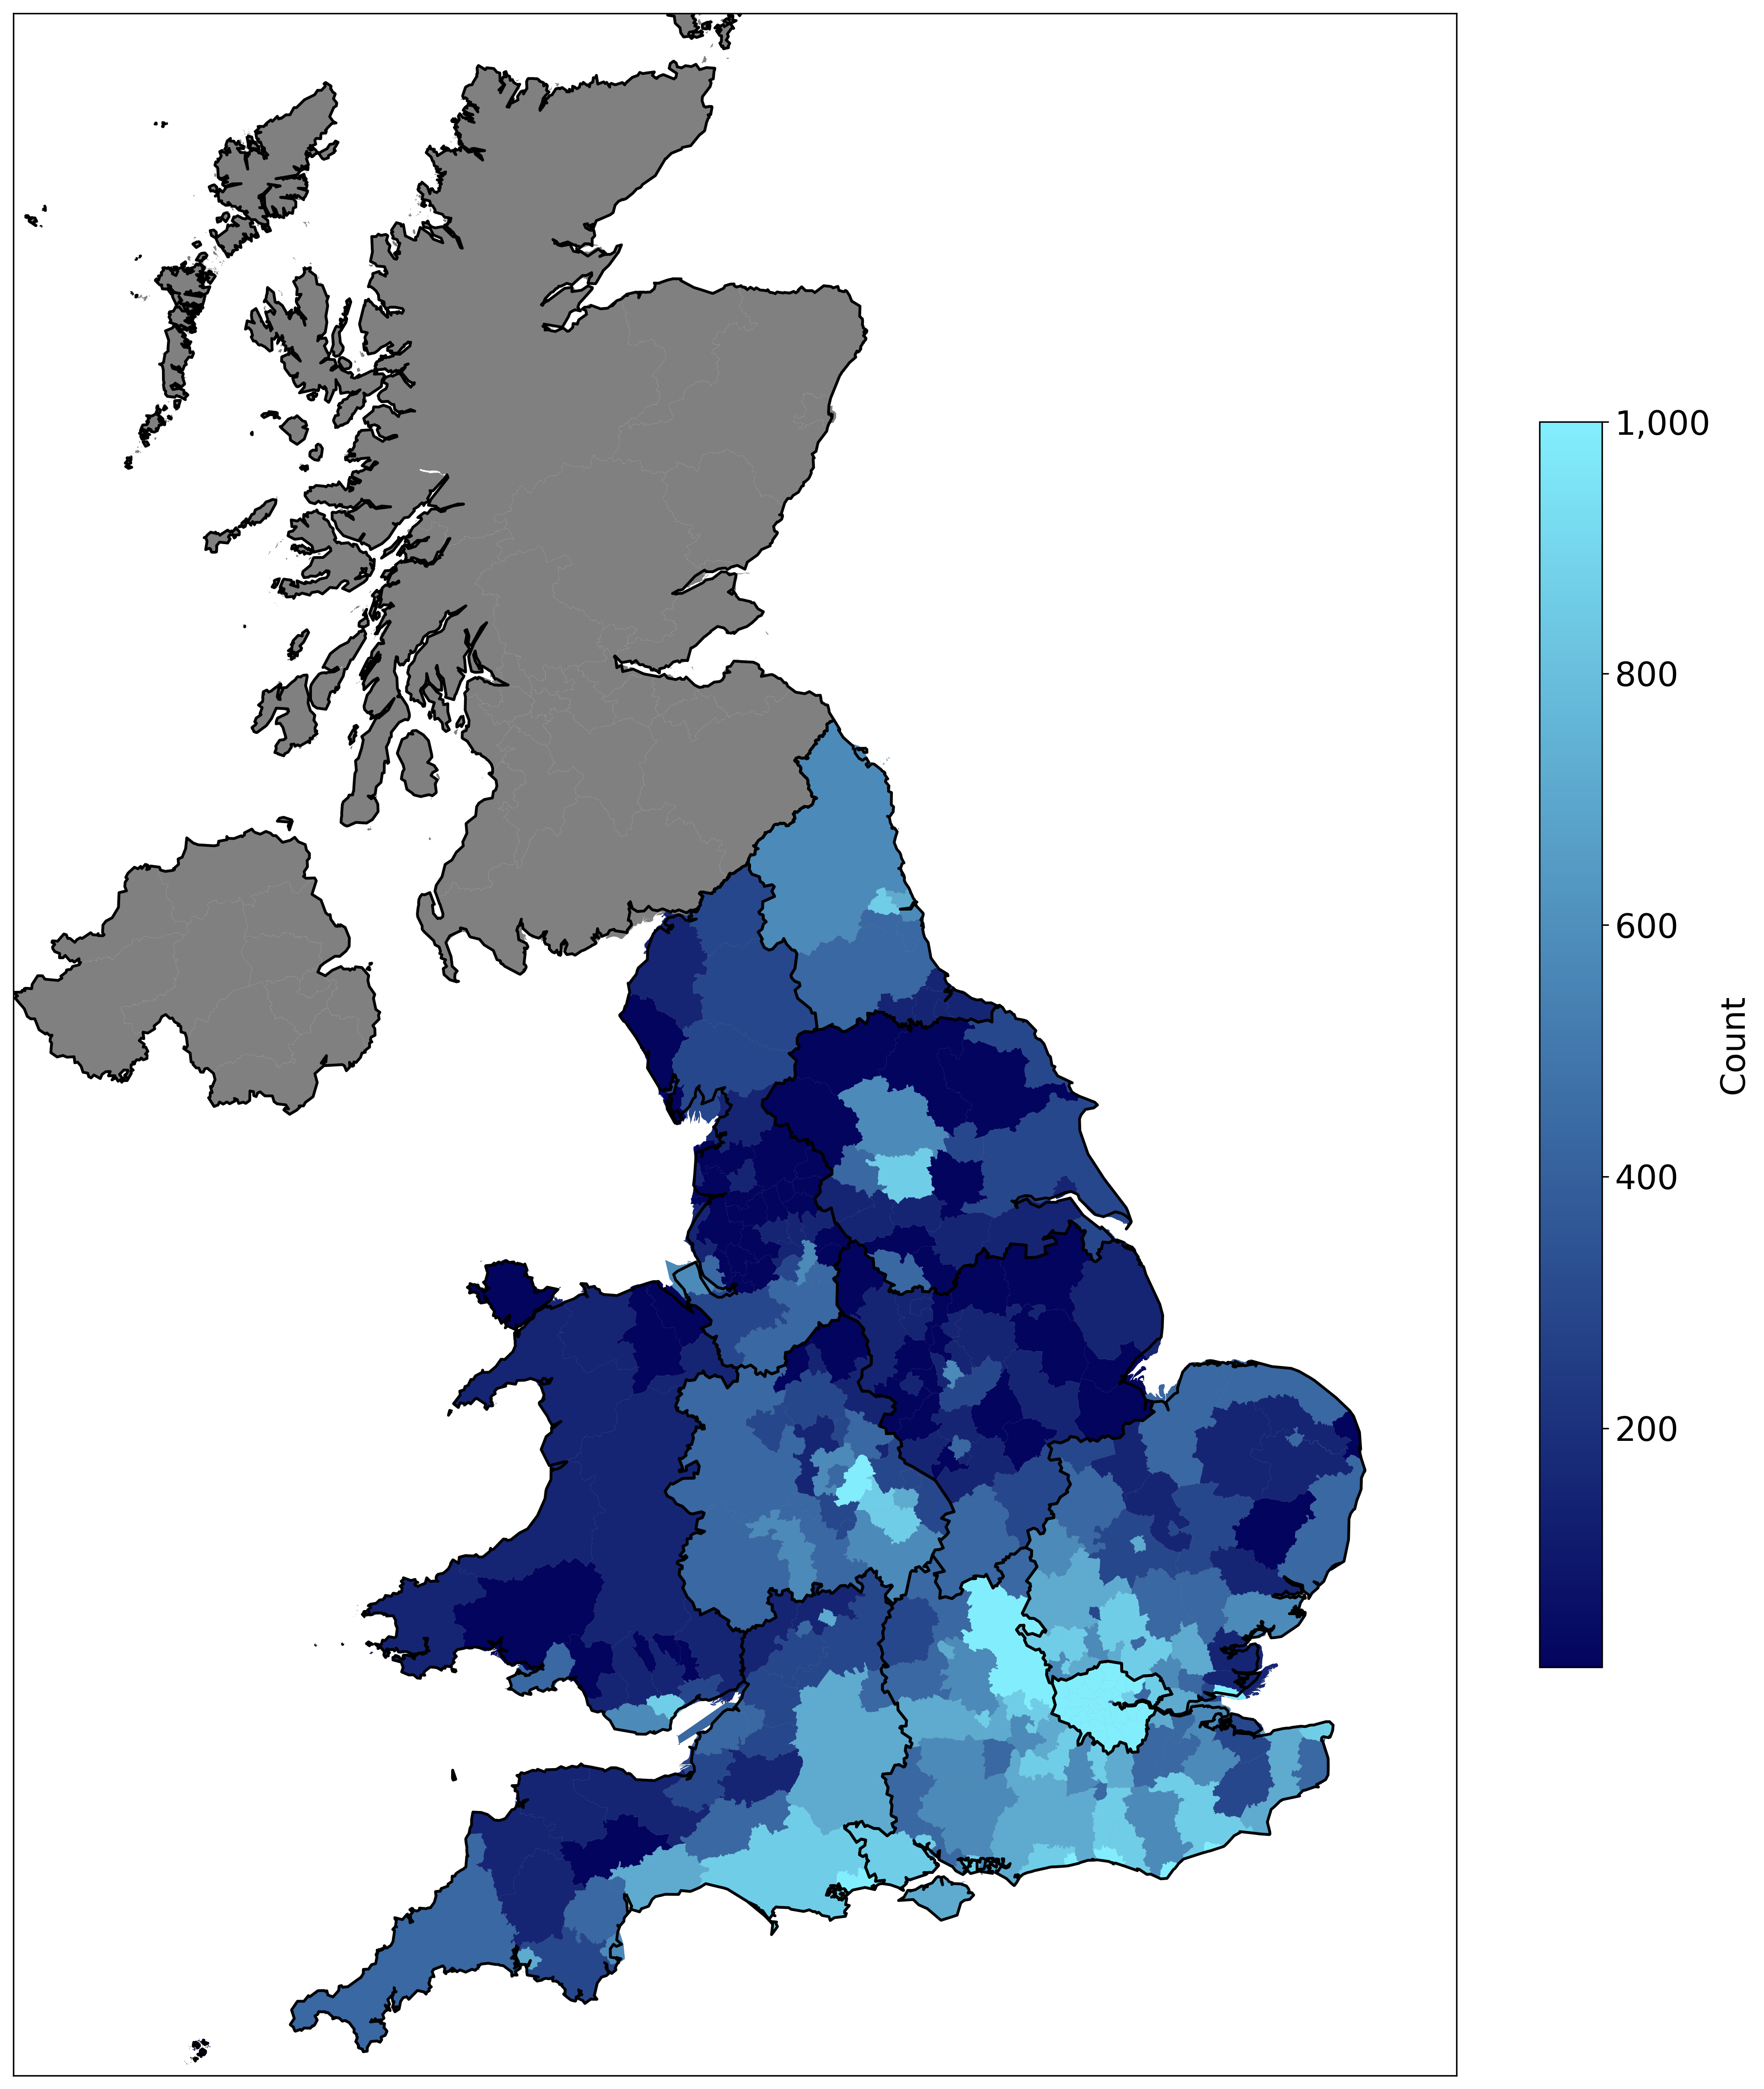

In [8]:
# Heat map
file = os.path.join(figures_folder, 'extension_heatmap.png')
bin_edges = [10, 50, 100, 200, 300, 500, 1000]

gdf.loc[(gdf['LAD22CD'].str.startswith(('W', 'E'))) & (gdf['count'].isna()), 'count'] = 0

fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
local_authorities.plot(ax=ax, color='gray')
gdf.plot(column='count', cmap=blue_cmap, ax=ax, legend=False, 
         scheme="User_Defined", classification_kwds=dict(bins=bin_edges)) 

regions.boundary.plot(edgecolor="black", ax=ax)

# Create a color bar legend with a gradient from dark blue to light blue
norm = Normalize(vmin=min(bin_edges), vmax=max(bin_edges))
sm = ScalarMappable(cmap=blue_cmap, norm=norm)
sm._A = []  # Array of data values to associate with the colormap.
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.04)
cbar.ax.tick_params(labelsize=18)  # Set the font size for the color bar ticks
cbar.set_label('Count', size=18)  # Set the label for the color bar
cbar.formatter = FuncFormatter(lambda x, _: '{:,d}'.format(int(x)))
cbar.update_ticks()

ax.set_xlim([0, 700000])
ax.set_ylim([0, 1000000])

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

plt.savefig(file, bbox_inches='tight', pad_inches=0)


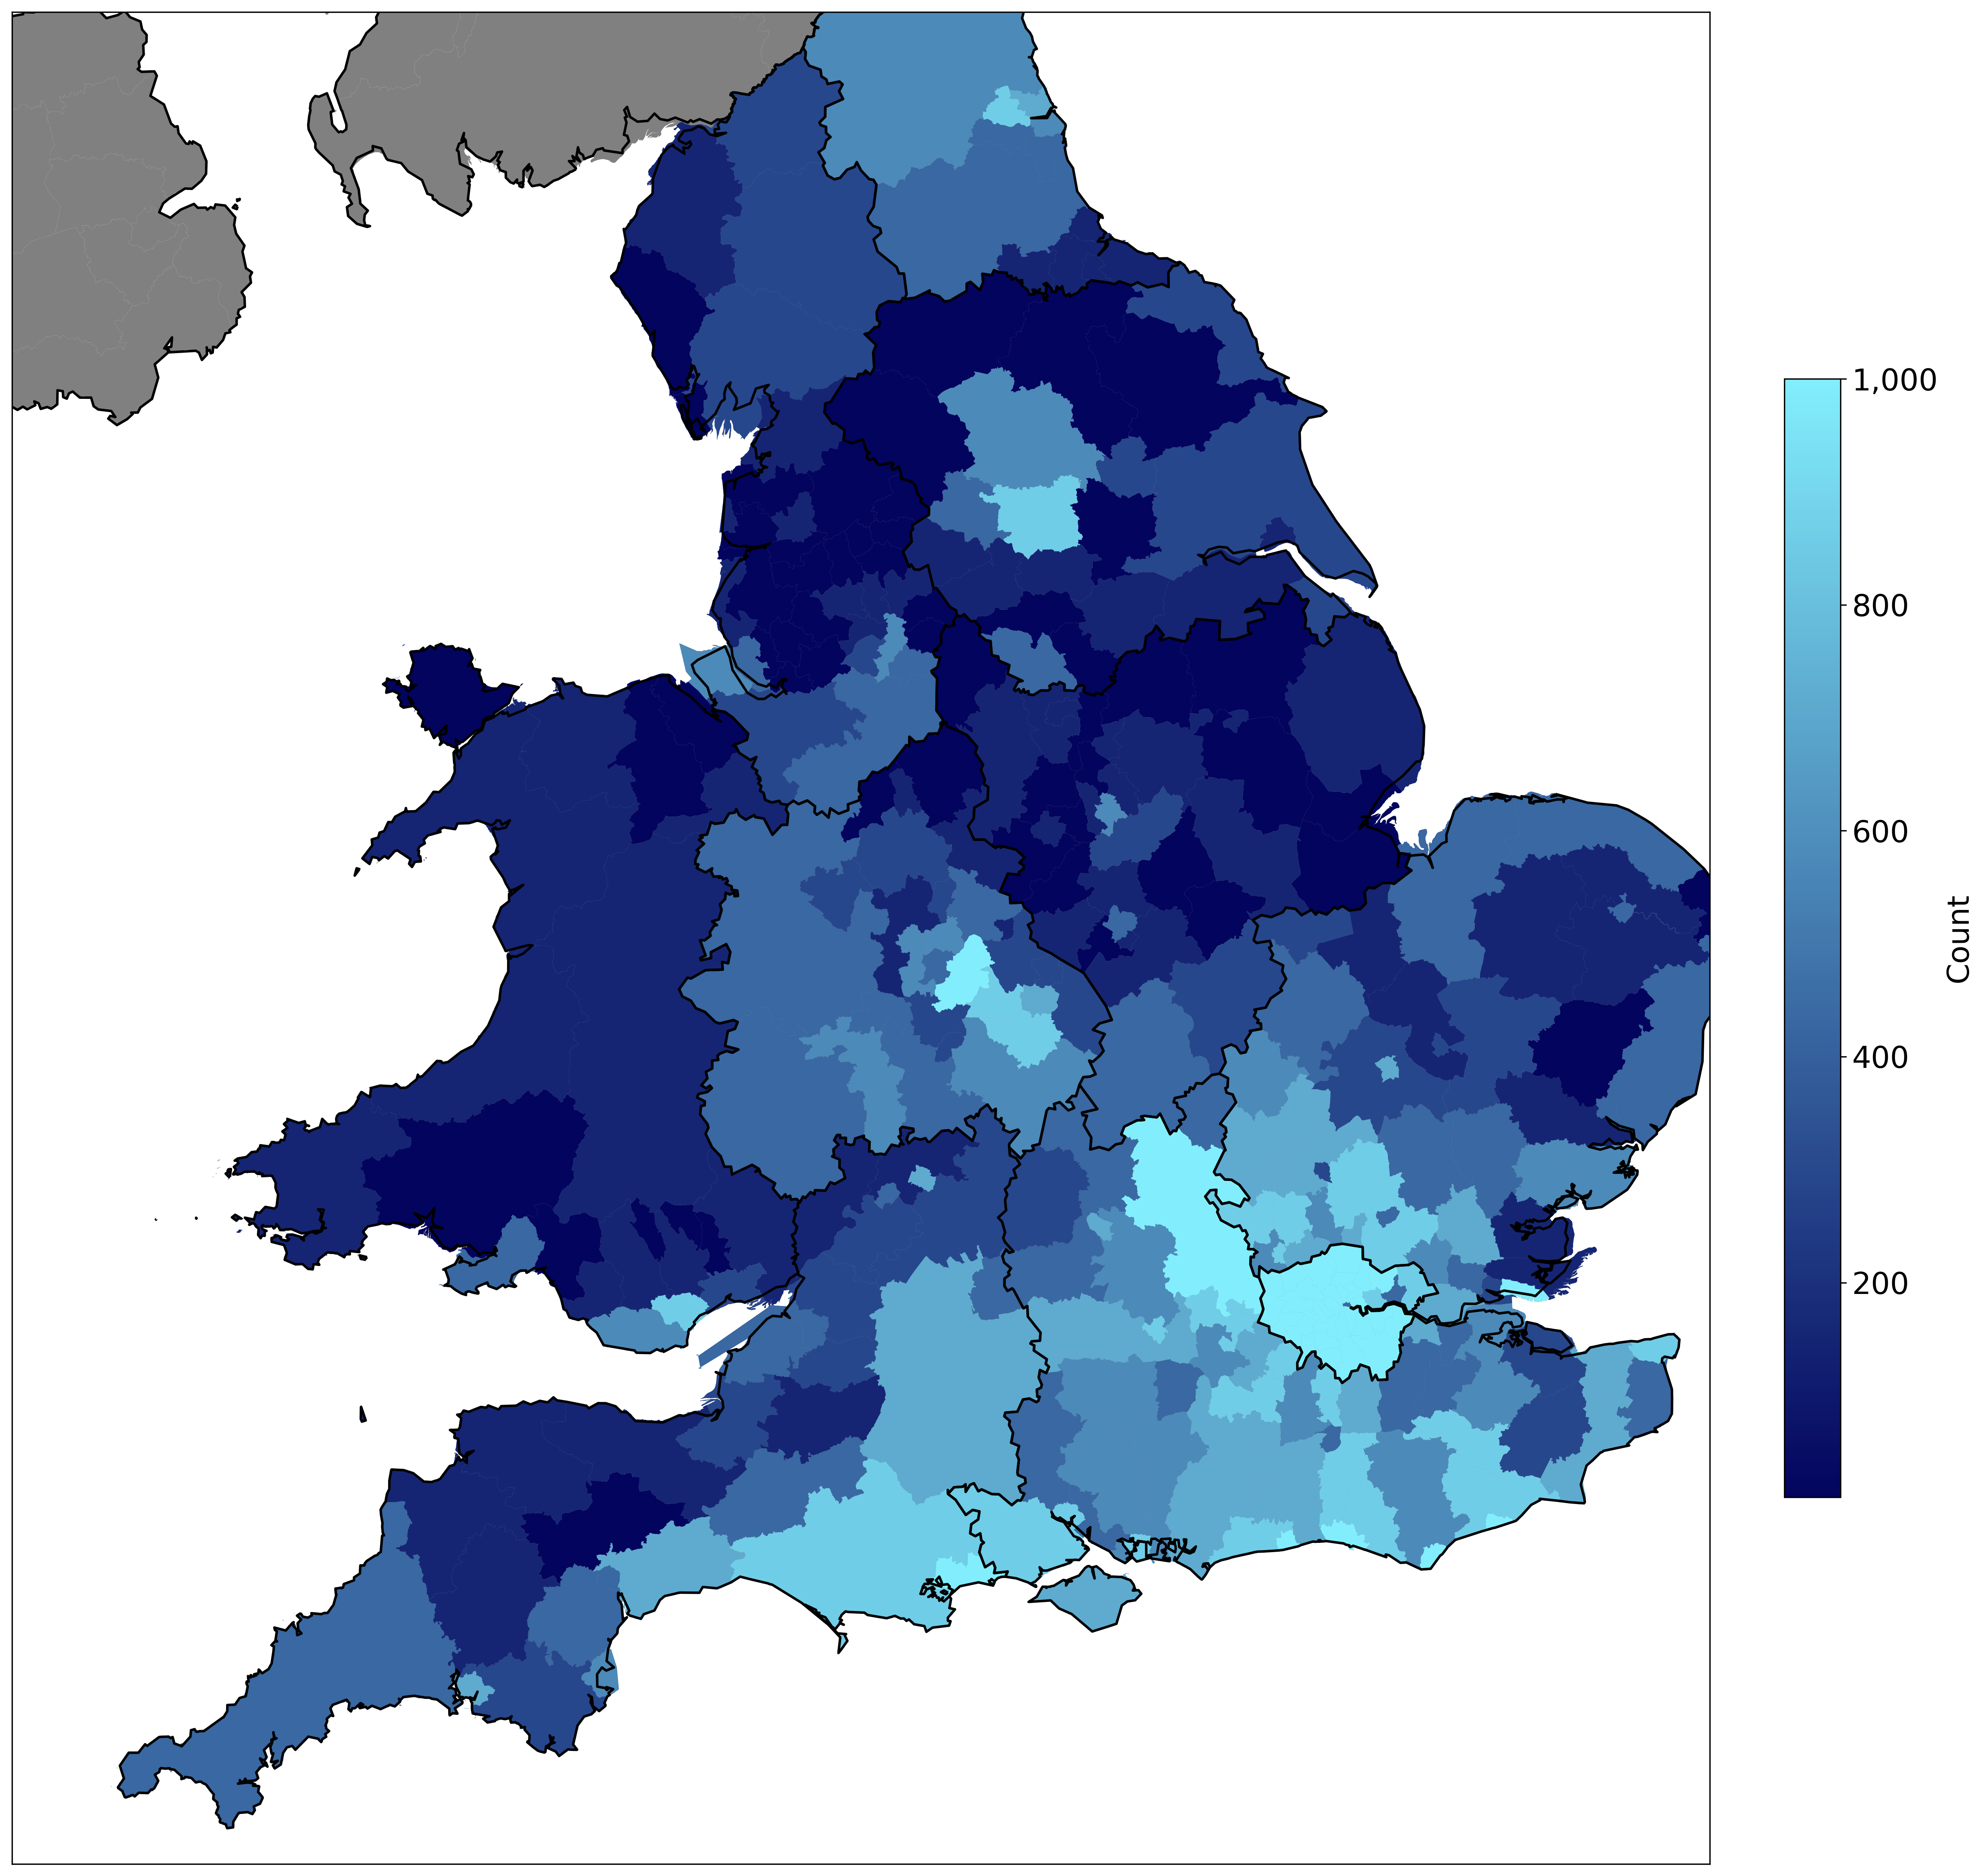

In [11]:
# Zoom in on England + Wales
file = os.path.join(figures_folder, 'extension_heatmap_zoom.png')
bin_edges = [10, 50, 100, 200, 300, 500, 1000]

gdf.loc[(gdf['LAD22CD'].str.startswith(('W', 'E'))) & (gdf['count'].isna()), 'count'] = 0

fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
local_authorities.plot(ax=ax, color='gray')
gdf.plot(column='count', cmap=blue_cmap, ax=ax, legend=False, 
         scheme="User_Defined", classification_kwds=dict(bins=bin_edges)) 

regions.boundary.plot(edgecolor="black", ax=ax)

# Create a color bar legend with a gradient from dark blue to light blue
norm = Normalize(vmin=min(bin_edges), vmax=max(bin_edges))
sm = ScalarMappable(cmap=blue_cmap, norm=norm)
sm._A = []  # Array of data values to associate with the colormap.
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.04)
cbar.ax.tick_params(labelsize=18)  # Set the font size for the color bar ticks
cbar.set_label('Count', size=18)  # Set the label for the color bar
cbar.formatter = FuncFormatter(lambda x, _: '{:,d}'.format(int(x)))
cbar.update_ticks()

ax.set_xlim([100000, 650000])
ax.set_ylim([0, 600000])

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

plt.savefig(file, bbox_inches='tight', pad_inches=0)
